# MOD510 - Modeling and Computational Engineering
## Group 4
### Group members:
**Andreas Nonslid Håvardsen**

**Daniel Fylling**

## Project 2 - Can you hear the size of a reservoir?

### Abstract 

In this project there the first excercise is to find steady-state solutions to linear equations, which extends to the secound exercise when finding time-dependent solutions. Here classes were made to initialize the linear equations and then to solve them. This proved to be a quite easy to use implementation, and was also used to simply generate some equations for exercise 3. In exercise 3 the solvers and %timeit functions work as intended, and the results were mostly as expected where the dense solver is worse than the sparse and using the Thomas algorithm given in the appendix of the project papers, given a tridiagonal matrix of order higher than 3. The Thomas algorithm also outperformed the dense solution even at a order of 3. Matching the model to well test data was done experimentally and worked out to be quite accurate. Overall most exercises seems to be completed successfully. 

### Introduction

In this project linear equations as models, and methods to analyze and use them are examined. In particular the solutions to the linear models, and difference to analytical solutions to find the error is examined in great detail. Different implementations are used, and compared.

This report goes through each exercise in order, and starts with the steady-state solutions to linear equations. It then moves on to the time-dependent solutions and analyzes the error of both types of solutions. Next, it goes on to the linear solvers and implementation strategies, and lastly shows a model matched to fit given datapoints. 

Carbon capture and storage will be important for sustaining a stable global climate. One method of CCS involves pumping CO2 into the ground. For the CO2 to stay in the ground we need to know that we pump it into a more or less closed reservoir.
Defining if a reservoir is bounded and how big it is can be done by test producing the reservoir, as has been done for the well presented in this project. In order to make optimal decisions on how to utilize our resources predicting such quantities is instrumental. Sound is a pressure vibration, and in this project we will be "listening" to the change of pressure underground, over time in order to determine the size of a reservoir.

[Start project in next cell, first and last cell is purely for mandatory document work]:<>

### Exercise 1
#### Part 1


<img src="fig/part1.png" width=350><p style="font-size: 0.9em"><i></i></p>


Integrating (16) twice will give the general solution to the pressure equation:

$$
\begin{equation}
p(y)=yC+C'
\tag{1}
\end{equation}
$$

Boundary condition (17) is used to identify C:

$$
\begin{equation}
\frac{dp}{dy}=\alpha=C
\tag{2}
\end{equation}
$$

Boundary condition (18) is used to identify C':

$$
\begin{equation}
p(y_e)=y_e\alpha+C'=p_{init}=>C'=p_{init}-y_e\alpha
\tag{3}
\end{equation}
$$

Inserting terms for C and C' from (2) and (3) into (1) and rearranging gives:

$$
\begin{equation}
p(y)=p_{init}+\alpha(y-y_e)
\tag{4}
\end{equation}
$$


#### Part 2

While writing in short hand notation and leaving out the truncation error  term (for now), the general finite difference equation is:

$$
\begin{equation}
\frac{d^2p}{dy^2}=\frac{P_{i+1}+P_{i-1}-2P_i}{\Delta y^2}
\tag{5}
\end{equation}
$$

After combining with (16) we get:

$$
\begin{equation}
P_{i+1}+P_{i-1}-2P_i=0
\tag{6}
\end{equation}
$$

<img src="fig/part2.png" width=400><p style="font-size: 0.9em"><i></i></p>

Writing out equations for nodes 0, 1, 2, and 3:

$$
\begin{equation}
P_{1}+P_{-1}-2P_0=0
\tag{7}
\end{equation}
$$

$$
\begin{equation}
P_{2}+P_{0}-2P_1=0
\tag{8}
\end{equation}
$$

$$
\begin{equation}
P_{3}+P_{1}-2P_2=0
\tag{9}
\end{equation}
$$

$$
\begin{equation}
P_{4}+P_{2}-2P_3=0
\tag{10}
\end{equation}
$$

To apply boundary condition (16), forward difference method is preferred since the condition is valid for the physical point located between cells $P_{-1}$ and $P_0$:

$$
\begin{equation}
\frac{dp}{dy}(y=y_w)=\frac{P_0-P_{-1}}{\Delta y}=\alpha
\tag{11}
\end{equation}
$$

Rearranging gives:

$$
\begin{equation}
P_{-1}=P_0-\alpha\Delta y
\tag{12}
\end{equation}
$$

Inserting this and the "lazy" boudary condition $P_4=P_e$, and rearranging equations (7-10) gives:

$$
\begin{equation}
-P_{0}+P_{1}-2P_0=\alpha\Delta y
\tag{13}
\end{equation}
$$

$$
\begin{equation}
P_0-2P_1+P_2=0
\tag{14}
\end{equation}
$$

$$
\begin{equation}
P_1-2P_2+P_3=0
\tag{15}
\end{equation}
$$

$$
\begin{equation}
P_2-2P_3=-p_e
\tag{19}
\end{equation}
$$

Rewriting into matrix form gives:

$$
\begin{equation}
\left(
\begin{array}{cccc}
-1&1&0&0\\ 
1&-2&1&0\\ 
0&1&-2&1\\ 
0&0&1&-2\\ 
\end{array}
\right)
\left(
\begin{array}{c}
P_0\\ 
P_1\\ 
P_2\\ 
P_3\\ 
\end{array}
\right)
=
\left(
\begin{array}{c}
\alpha\Delta y\\ 
0\\ 
0\\ 
-p_e
\end{array}
\right).
\end{equation}
\tag{20}
$$

#### Part 3

The truncation error introduced from the current form of the Taylor equation is:

$$
\begin{equation}
\epsilon=\frac{2}{4!}P^{(4)}(y)\Delta y^2
\tag{21}
\end{equation}
$$

Since P(y) is a linear equation, the fourth derivative will be zero for all y.

#### Part 4

<img src="fig/part4.png" width=100><p style="font-size: 0.9em"><i></i></p>

### Lazy error
To find the error term of lazy method we start with a Taylor expansion of $P_4$.

$$
\begin{equation}
P_4 = P(y_e+\Delta y/2)=P(y_e)+P'(y_e)\Delta y/2+...
\tag{22}
\end{equation}
$$

Looking at the error terms and expanding it with forward difference gives:

$$
\begin{equation}
\epsilon=P'(y_e)\Delta y/2=\frac{P_4-P_e}{\Delta y/2}\Delta y/2
\tag{23}
\end{equation}
$$

Inserting original pressure function (4) and shortening expression gives:

$$
\begin{equation}
\epsilon=\alpha(y_4-y_e)+p_{init}-[\alpha(y_e-y_e)+p_{init}]=\alpha\Delta y/2
\tag{24}
\end{equation}
$$

From this expression we can see that the error, in pressure, is proportional to both $\alpha$ and $\Delta y$. In this case, where $\alpha$ is constant the error will scale linearly with $\Delta y=y_e/N$. Doubling the amount of nodes is then expected to halve the error.

### "Not-so-lazy" expression
To derive "not-so-lazy" value for $P_4$, the forward difference method with step size $\frac{\Delta y}{2}$ is used:

$$
\begin{equation}
P'(y)=\frac{P_{i+1}-P_i}{\Delta y/2}
\tag{25}
\end{equation}
$$

As we know that $P'(y)=\alpha$ for all y we can write out forward difference equations for nodes $P_3$ and $P_e$:

$$
\begin{equation}
\frac{P_e-P_3}{\Delta y/2}=\alpha
\tag{26}
\end{equation}
$$

$$
\begin{equation}
\frac{P_4-P_e}{\Delta y/2}=\alpha
\tag{27}
\end{equation}
$$

After moving $\Delta y/2$ to right hand side we can subract (24) from (23) to obtain:

$$
\begin{equation}
P_e-P_3-(P_4-P_e)=0
\tag{28}
\end{equation}
$$

By rearranging and generalizing the equation we get:

$$
\begin{equation}
P_N=2P_e-P_{N-1}
\tag{29}
\end{equation}
$$

### "Not-so-lazy" matrix
Including new and improved boundary condition into the matrix gives:

$$
\begin{equation}
\left(
\begin{array}{cccc}
-1&1&0&0\\ 
1&-2&1&0\\ 
0&1&-2&1\\ 
0&0&1&-3\\ 
\end{array}
\right)
\left(
\begin{array}{c}
P_0\\ 
P_1\\ 
P_2\\ 
P_3\\ 
\end{array}
\right)
=
\left(
\begin{array}{c}
\alpha\Delta y\\ 
0\\ 
0\\ 
-2p_e
\end{array}
\right).
\end{equation}
\tag{30}
$$

#### Part 5

In [2]:
from Reservoir import Reservoir
from Reservoir import plot_error
import matplotlib.pyplot as plt
import numpy as np

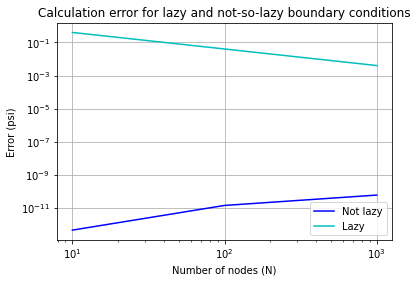

N = [  10  100 1000]
Not lazy = [4.547473508864641e-13, 1.4097167877480388e-11, 5.95719029661268e-11]
Lazy = [0.40267295875992204, 0.040267295890316745, 0.004026729647193861]


In [3]:
N_vals = np.logspace(1, 3, 3).astype(int)
plot_error(N_vals)

The function plot_error calculates the difference between numerical solver and analytic solution in the same physical points for both lazy and not-so-lazy boundary conditions. It can be observed that for lazy method the error is scaling as expected from not-so-lazy the analytic investigation in Part 4. The error for not-so-lazy method is very small, but has an increasing trend. We speculate that this may be related to machine error / finite number comuting contributing relatively more when step size decreases.

While taking a step back and observing that the units of the error is in psi, we realize that even the lazy method would likely have sufficient accuracy for a real life implementation.

### Exercise 2
#### Part 1

<img src="fig/Ex2p1_1.png" width=550><p style="font-size: 0.9em"><i></i></p>
<img src="fig/Ex2p1_2.png" width=550><p style="font-size: 0.9em"><i></i></p>

#### Part 2

In [2]:
from PressureSolver import PressureSolver

In [5]:
PressureSolver(dt=0.01*24).A_matrix()

[[ 5.28702460e+03 -5.28602460e+03  0.00000000e+00  0.00000000e+00]
 [-9.42633218e+01  1.89526644e+02 -9.42633218e+01  0.00000000e+00]
 [ 0.00000000e+00 -1.68095582e+00  4.36191165e+00 -1.68095582e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.99757363e-02  1.08992721e+00]]


#### Part 3

See Excercise 3 and 4.

### Exercise 3
#### Part 1

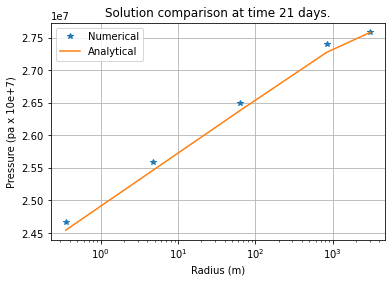

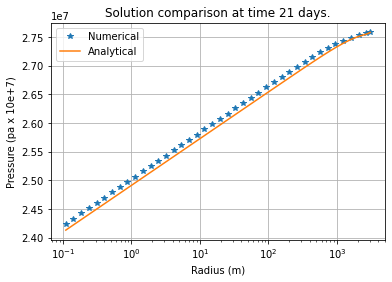

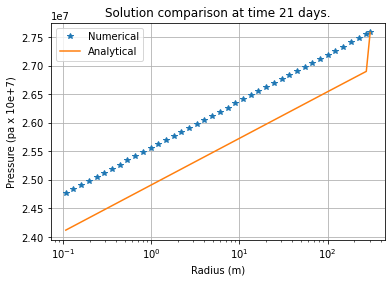

In [7]:
PressureSolver(N=4, dt=499, t_final=500,  k=250, re=10000, p_i=4000).solution_comparison()
PressureSolver(N=40, dt=499, t_final=500,  k=250, re=10000, p_i=4000).solution_comparison()
PressureSolver(N=40, dt=499, t_final=500,  k=250, re=1000, p_i=4000).solution_comparison()

First two plots show difference between numerical solver and line solution for N = 4 and N = 40. Qualitatively we can see that the curves fit quite well, even if some systemetic difference is observable in order of magnitude 1%.

Third plot shows what happens when time passes beyond reaching stedy state for numerical solver. The reason is that line solution assumes infinite reservoir. Note that the last node for line solution for y_e is forced to be equal to p_e.

#### Part 2

In this Part the %timeit functionality is used to find the difference in time used by the solvers. The solvers are imported and shown in the appendix at the end of the report. The Thomas algorithm is taken from the project paper's appendix. 

In [11]:
from linearSolvers import denseSolver, sparseSolver, thomasAlgorithmSolver
from scipy.sparse import linalg

In [13]:
def timeit(f, N):
    """
    Uses %timeit on the function given as parameter 1. \\
    Creates a NxN A matrix and Nx1 b array for equation 'Ax=b'. \\
    Solves it using function given as parameter 1.
    Args:
        f (function): Function used to solve equation 'Ax=b'.
        N (double): Integer value which determines size of A and b for equation to calculate 'Ax=b'.
    """
    ps = PressureSolver(N = N)
    A = ps.A
    b = ps.b
    %timeit f(A, b)

# TIME WITH DIFFERENT N
import warnings
warnings.filterwarnings('ignore') # Thomas algorithm has overflow issues

print("----------------------------------------------------------")
N_vals = [4, 40, 400, 4000]
for N in N_vals:
    print(f'Dense solver with N = {N}')
    timeit(denseSolver, N)
    print(f'Sparse solver with N = {N}')
    timeit(sparseSolver, N)
    print(f'Thomas algorithm solver with N = {N}')
    timeit(thomasAlgorithmSolver, N)
    print("----------------------------------------------------------")

warnings.filterwarnings('default')

----------------------------------------------------------
Dense solver with N = 4
9.47 µs ± 262 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Sparse solver with N = 4
278 µs ± 8.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Thomas algorithm solver with N = 4
50 µs ± 826 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
----------------------------------------------------------
Dense solver with N = 40
33 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Sparse solver with N = 40
329 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Thomas algorithm solver with N = 40
159 µs ± 9.84 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
----------------------------------------------------------
Dense solver with N = 400
16.4 ms ± 743 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sparse solver with N = 400
1.87 ms ± 54.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Thomas algorith

The results here highlight the usefulness of sparse matrices very well. When N grows
and there are more empty cells in the A matrix, the sparse techniques have a exponential
relationship of execution time difference to the dense solver with respect to N.

#### Part 3 (Optional)

By comparing the result for "one big" time step *h* with the result of doing "two small" time steps *h/2*. The difference between the "true" solution and the result for "two small" time steps will be equal to the difference between "two small" steps and "one big".

### Exercise 4
#### Part 1

<img src="fig/Ex4p1.png" width=400><p style="font-size: 0.9em"><i></i></p>

In [16]:
PressureSolver(dt=200, t_final=2000, k=250, re=10000, p_i=4000).Numeric_BHP()

array([27579029.16      , 24319847.29360438, 24275983.19803914,
       24274036.09213634, 24273949.23377997, 24273945.35901853,
       24273945.18616495, 24273945.17845393, 24273945.17810993,
       24273945.17809459, 24273945.17809391, 24273945.17809387])

#### Part 2

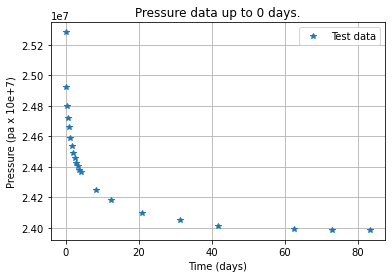

In [3]:
PressureSolver().match_test_data(Test_data = True, Numerical = False, Line_solution = False, x_scale='linear')

#### Part 3

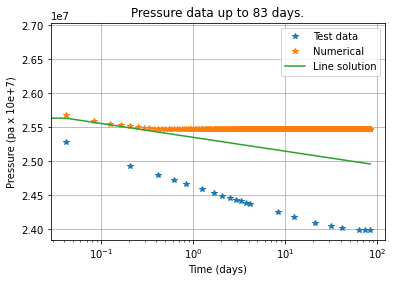

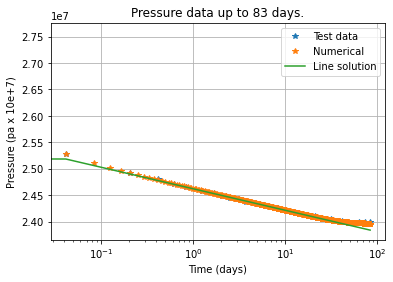

In [4]:
PressureSolver(N= 40, dt=1, t_final=2000, k=500, re=1000, p_i=3900).match_test_data(Test_data = True, Numerical = True, Line_solution = True)
PressureSolver(N= 40, dt=1, t_final=2000, k=250, re=10000, p_i=4000).match_test_data(Test_data = True, Numerical = True, Line_solution = True)

Comparing numerical solution and line solution to test data.
Showing plots of original input parameters and curve fitted parameters.</br>

Curve fitting was done manually following this process:
1. Adjusted R_e to show effect of hitting reservoir boundary toward end of well test. 
    - By increasing R_e it will take longer time to reach steady state, or the flattening trend we see in the test data towards the end.
2. Adjusted k to match slope of test data.
    - Decreasing k (permeability) will decrease the slope of the curve. Higher permeability will promote flow and reduce friction.
3. Adjusted initial pressure to shift curve vertically.
4. (iterated to fine tune).

We note that the line solution will not be able to show the effect of hitting reservoir boundary as it assumes a boundless reservior.

#### Part 4

In [20]:
print(f'{PressureSolver(re=10000).Volume_of_water():.0f} cubic meters')

24463999 cubic meters


With nothing else to go by to judge if the result makes sense we can say that 24 million cubic meters would equate a small oil reservoir and seems like a plausible result for the input data.

### Reflections

We had frequent meetings using Teams, on average every 4~ days. We split up the work, worked separately and then during meetings brought eachother up to speed on what we had been doing, what developments had occurred and what issues we were currently facing. We also made all large decisions on style and format in unison. Git hub was used as collaboration platform for project files.

We learned about model errors, numerical calculation errors in different methods and about analytical vs numerical errors. We also learned how to implement both types and several types of solvers.

#### Andreas
I was fortunate in having a partner who had relevant domain knowledge from previous a degree and work experience to understand and work with the derivations of this project. Because of this, I could focus on setting up a better report template to work with for all the next projects in this course, by using the feedback from project 1 as a guide. Because of my solid understanding of Python, I could also assist and work together with Daniel to create solutions which worked as we expected. The code still lacks a lot of fine-tuning both in terms of optimization and bug smells, but we simply have to move on for time management reasons.

Utilizing the Thomas algorithm to solve the linear equations produced warnings about overflow, which probably means it reaches an incredibly large number at some point. This sometimes worked and other times didn't, which is why it was simply ignored. We maybe should've tried to make the function more robust, and/or improve it generally speaking.

#### Daniel
As a novice programmer I learned many things, spanning from how to use pandas to import data to an array to learning that my natural way of thinking very often results in a usable code. I'm also very fortunate to have an experienced programmer in my group, who have taught me about coding convensions and how to improve readablity and future vale of the code we produce today. More technically from the project I've learned, again, that robust mathematics simply works! It's fun to live in a paradigm where natural phenomenon can be desciphered and used to predict future events. Having some domain knowledge into petroleum engineering helped me visualize the mechanics involved in this project.

We encountered some compatibility issues between anaconda and jupyter note books, where it was very cumbersome to run code from external python file after updating it (VS-code had to be reset every time). For next project we will investigate how to setup our system to make the work easier.

### Conclusion

Learned about error gathering and comparisons, giving insight into modelling consequences. Also got experience with implementing algorithms to solve linear equations, in several ways and comparing their speed (at least for the use case of tridiagonal matrices).

Can most likely improve the performance of most of the code in some way. Numba couldfor example be used in the linear solver for the Thomas algorithm, but it was left as it is because it seemed sufficient since it was already the fastest at higher choices of *N* anyway.

Most of the time during this work we encountered two types of issues;
1. Code implementation issues
2. Theoretical issues

For the theoretical issues we mostly looked at the lecture notes and course book. The previous Part with the heat equation was particularly useful. For the code implementation issues we mostly consulted the documentation of the library we worked with or rewrote our code.

### References
1. [NumPy documentation](https://numpy.org/doc/)
2. [SciPy documentation](https://docs.scipy.org/doc/scipy/)
3. [Timeit](https://docs.python.org/3/library/timeit.html)
4. Lecture notes
5. [Course book](https://github.com/ahiorth/CompEngineering)
6. Computational physics, by Mark E.J. Newman (2013)
7. [Teams](https://www.microsoft.com/en-us/microsoft-teams/log-in)
8. [World can ‘safely’ store billions of tonnes of CO2 underground](https://www.carbonbrief.org/world-can-safely-store-billions-tonnes-co2-underground/)

### Appendix A - Python files
#### Reservoir.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class Reservoir:

    def __init__(self, N=4, r_e=1000, r_w=0.318, alpha=1, p_init=3900, lazy=False):

        self.N = N  # number of nodes
        self.lazy = lazy
        self.r_e = r_e  # ft
        self.r_w = r_w  # ft
        self.alpha = alpha
        self.p_init = p_init  # psi
        self.y_e = np.log(r_e/r_w)  # dimensionless
        self.h = self.y_e/N  # h = \Delta y

        # shifting nodes h/2 away from y_w and y_e
        self.y = np.linspace(self.h/2, self.y_e-self.h/2, self.N)
        self.y = np.append(self.y, self.y_e)  # manually adding y_e
        # transforming y back into radius for plotting
        self.r = self.r_w*np.exp(self.y)

        self.ya = np.linspace(0, self.y_e, 100)
        # transforming ya back into radius for plotting
        self.ra = self.r_w*np.exp(self.ya)

        self.sol = self.pressure_solver()

        self.N_all = np.logspace(0, 1, 2).astype(int)*4
        self.e_lazy = []
        self.e_not_lazy = []

        self.e = 0

    def P(self, y):
        sola = self.alpha*(y-self.y_e)+self.p_init
        return sola

    def pressure_solver(self):

        a = np.ones(self.N-1)
        a2 = np.ones(self.N-1)
        b = np.repeat(-2, self.N)

        # right hand side
        c = np.zeros(self.N)

        # internal boundary
        b[0] = -1
        c[0] = self.alpha*self.h

        # exterior boundary
        if self.lazy:
            c[-1] = -self.p_init
        else:
            # not so lazy
            b[-1] = -3
            c[-1] = -2*self.p_init

        # k=0 diagonal, k neq 0 off diagonal
        A = np.diag(a2, k=-1)+np.diag(b, k=0)+np.diag(a, k=1)
        sol = np.linalg.solve(A, c)

        # manually adding p_init to match y_e in y-array
        sol = np.append(sol, self.p_init)
        return sol

    def plot_pressure(self):
        if self.lazy:
            leg = 'Lazy'
        else:
            leg = 'Not-so-lazy'

        plt.plot(self.r, self.sol, '*', label='Numerical, '+leg)
        plt.plot(self.ra, self.P(self.ya), '-', label='Analytical')
        plt.title('{} method with N={}'.format(leg, self.N))
        plt.grid()
        plt.legend()
        return

        # difference between analytical and numerical solution in p_0
    def single_error(self):
        error = self.P(self.y)[0] - self.pressure_solver()[0]
        return error

def plot_error(N_vals):
    notLazy = []
    lazy = []

    for i in N_vals:
        notLazy.append(Reservoir(N=i).single_error())
        lazy.append(Reservoir(N=i, lazy=True).single_error())

    fig, ax = plt.subplots()
    ax.set_title('Calculation error for lazy and not-so-lazy boundary conditions')
    ax.set_xlabel('Number of nodes (N)')
    ax.set_ylabel('Error (psi)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    x_val = N_vals
    y_vals = [notLazy, lazy]
    labels = ["Not lazy", "Lazy"]
    cols = ['b', 'c']
    points = ['-', '-']
    for y_val, point, col, label in zip(y_vals, points, cols, labels):
        ax.plot(x_val, y_val, point, c=col, label=label)
    plt.grid()
    plt.legend()
    plt.show()

    print(f'N = {N_vals}')
    print(f'Not lazy = {notLazy}')
    print(f'Lazy = {lazy}')



#### PressureSolver.py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sc

class PressureSolver:
    """
    A finite difference solver to solve pressure distribution in
    a reservoir, logarithmic grid has been used, y = ln(r/rw)
    The solver uses SI units internally, while "practical field units"
    are required as input.
    A and b is the system of style 'Ax=b'.
    Input arguments:
    name symbol unit
    --------------------------------------------------------------
    Number of grid points N dimensionless
    Constant time step dt days
    Well radius rw ft
    Outer reservoir boundary re ft
    Height of reservoir h ft
    Absolute permeability k mD
    Porosity phi dimensionless
    Fluid viscosity mu mPas (cP)
    Total (rock+fluid) compressibility ct 1 / psi
    Constant flow rate at well Q bbl / day
    Initial reservoir pressure pi psi
    14
    -------------------------------------------------------------
    """

    def __init__(self,
                 N=4,
                 dt=0.010,
                 t_final=1,
                 rw=0.318,
                 re=1000.0,
                 h=11.0,
                 phi=0.25,
                 mu=1.0,
                 ct=7.8e-6,
                 Q=1000.0,
                 k=500,
                 p_i=3900.0):

        # Unit conversion factors (input units --> SI)
        self.ft_to_m = 0.3048
        self.psi_to_pa = 6894.75729
        self.day_to_sec = 24*60*60
        self.hour_to_sec = 60*60
        self.bbl_to_m3 = 0.1589873

        # Grid
        self.N = N
        self.r_w = rw*self.ft_to_m
        self.r_e = re*self.ft_to_m
        self.h = h*self.ft_to_m

        self.y_e = np.log(self.r_e/self.r_w)  # dimensionless
        self.dy = self.y_e/N  # h = \Delta y
        # shifting nodes h/2 away from y_w and y_e
        self.y = np.linspace(self.dy/2, self.y_e-self.dy/2, self.N)
        # transforming y back into radius for plotting
        self.r = self.r_w*np.exp(self.y)

        # Rock and fluid properties
        self.k = k*1e-15 / 1.01325
        self.phi = phi
        self.mu = mu*1e-3
        self.ct = ct / self.psi_to_pa
        self.n_diff = self.k/self.mu/self.phi/self.ct  # hydraulic diffusivity constant

        # Initial and boundary conditions
        self.Q = Q*self.bbl_to_m3 / self.day_to_sec
        self.p_i = p_i*self.psi_to_pa

        # Time control for simulation
        self.t = 0
        self.dt = dt*self.hour_to_sec
        self.t_final = t_final*self.hour_to_sec
        self.t_all = []

        # Calculation constants
        self.eta = self.n_diff*np.exp(-2*self.y)*self.dt/self.r_w**2/self.dy**2
        self.beta = self.Q*self.mu*self.dy/(2*np.pi*self.k*self.h)

        # defina diagolas  and d vector
        self.upperDiag = -self.eta[1:]
        self.diag = np.ones(self.N)+2*self.eta
        self.lowerDiag = -self.eta[0:self.N-1]
        self.d = np.zeros(self.N)

        # internal boundary
        self.diag[0] = self.diag[0]-self.eta[0]
        self.d[0] = -self.beta*self.eta[0]

        # exterior boundary
        self.diag[-1] = self.diag[-1]+self.eta[-1]
        self.d[-1] = 2*self.p_i*self.eta[-1]

        self.P_ini = np.repeat(self.p_i, self.N)
        self.P_all = np.transpose(self.P_ini)
        self.P_an_all = np.transpose(self.P_ini)
        self.A = self.tri_diag()
        self.b = self.P_ini + self.d

    def tri_diag(self, k1=-1, k2=0, k3=1):
        return np.diag(self.upperDiag, k1) + np.diag(self.diag, k2) + np.diag(self.lowerDiag, k3)

    def A_matrix(self):
        print(self.A)
        return

    def solve(self):
        self.rhs = self.d+self.P_old
        self.rhs[-1] = self.d[-1]+self.p_i  # constant pressure at boudary
        self.P_new = np.linalg.solve(self.A, self.rhs)
        return

    def solve_time(self):
        self.P_old = self.P_ini
        while self.t <= self.t_final:
            self.solve()
            self.P_old = np.copy(self.P_new)
            self.P_all = np.c_[self.P_old, self.P_all]
            self.t_all = np.append(self.t_all, self.t) # collecting time steps for plotting later
            self.t += self.dt
        # adding row of p_i to correspond to y_e /  r_e
        self.P_all = np.r_[self.P_all, [
            np.repeat(self.p_i, len(self.P_all[0]))]]
        return

    def Numeric_BHP(self):
        # extrapolates pressure in node p_0 to p_w and returns pressure vector for all nodes.
        self.solve_time()
        pw_num = np.flip(self.P_all[0, :]-self.beta/2) 
        pw_num[0] = self.p_i  # correcting point at t=0 to be initial pressure
        return pw_num

    def test_data(self):
        # extracts test data from data file and puts it into arrays
        df = pd.read_csv('data/well_bhp.dat', '\t')
        self.test_bhp = np.asarray(df['well_pressure'])*self.psi_to_pa
        self.test_time = np.asarray(df['time'])*self.hour_to_sec
        return

    def match_test_data(self, Test_data = True, Numerical = True, Line_solution = True, x_scale='log'):
        # gathers data from other internal functions and plots Well test data vs Numerical solution in the same plot
        # the plot can be used to tweak unkown calculation input manually to match test data
        pw_num = self.Numeric_BHP()
        self.test_data()
        fig = plt.figure()
        self.t = self.dt
        self.line_solution(self.r_w)
        ax = fig.add_subplot(1, 1, 1)
        if Test_data == True:
            ax.plot(self.test_time/self.day_to_sec, self.test_bhp, '*', label='Test data')
        if Numerical == True:
            ax.plot(self.t_all/self.day_to_sec, pw_num[:-1], '*', label='Numerical')
        if Line_solution == True:
            ax.plot(self.t_all/self.day_to_sec, np.flip(self.P_an_all[0,:]), label='Line solution')
        ax.legend(loc='best')
        ax.set_title(f'Pressure data up to {self.t_final/self.day_to_sec:.0f} days.')
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Pressure (pa x 10e+7)')
        plt.xscale(x_scale)
        plt.grid()
        return

    def line_solution(self, r):
        while self.t <= self.t_final:
            self.P_an = self.P_ini+self.Q*self.mu/4/np.pi/self.k / \
                self.h*sc.expi(-r*r/4/self.n_diff/self.t)
            self.P_an_all = np.c_[self.P_an, self.P_an_all]
            self.t += self.dt
        # adding row of p_i to correspond to y_e /  r_e
        self.P_an_all = np.r_[self.P_an_all, [
            np.repeat(self.p_i, len(self.P_an_all[0]))]]
        return

    def Volume_of_water(self):
        return np.pi*self.r_e*self.r_e*self.h*self.phi

    def plot(self, p):
        plt.title('Pressure distribution up to ' + str(self.t_final/self.day_to_sec
                                                       ) + ' days, with dt ' + str(self.dt/self.day_to_sec) + ' days.')
        plt.plot(np.append(self.r, self.r_e), p, '*')
        plt.xscale('log')
        plt.grid()
        plt.show()
        return

    def solution_comparison(self):
        # for a comparison at a single point in time set dt slightly less than t_final, fex dt=199, t_final=200
        self.t = self.dt
        self.solve_time()
        self.t = self.dt
        self.line_solution(self.r)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.title(f'Solution comparison at time {self.t_final/self.day_to_sec:.0f} days.')
        ax.plot(np.append(self.r, self.r_e),
                self.P_all[:, -2], '*', label='Numerical')
        ax.plot(np.append(self.r, self.r_e),
                self.P_an_all[:, -2], label='Analytical')
        # loc=best, Automatically determines the position the place the legend desc.
        ax.legend(loc='best')
        ax.set_xlabel('Radius (m)')
        ax.set_ylabel('Pressure (pa x 10e+7)')
        plt.xscale('log')
        plt.grid()
        return

#### linearSolvers.py

In [ ]:
import numpy as np
import scipy


def denseSolver(A, b):
    """
    Use dense solver which is a direct solver for a dense system 'Ax=b'.
    :param A: A NumPy 2D array of a tridiagonal matrix-
    :param b: A NumPy 1D array of the b vector of the equation 'Ax=b'.
    :return: A NumPy 1D array of the x vector of the equation 'Ax=b', 
    """
    return np.linalg.solve(A, b)


def sparseSolver(A, b):
    """
    Use sparse solver which accelerates solving speed when many of the elements is 0. Solves systems in form 'Ax=b'.
    :param A: A NumPy 2D array of a tridiagonal matrix-
    :param b: A NumPy 1D array of the b vector of the equation 'Ax=b'.
    :return: A NumPy 1D array of the x vector of the equation 'Ax=b', 
    """
    return scipy.sparse.linalg.spsolve(scipy.sparse.csr_matrix(A), b)


def thomasAlgorithmSolver(A, b):
    """
    Interface function for the thomas_algorithm function below.
    :param A: A NumPy 2D array of a tridiagonal matrix.
    :param b: A NumPy 1D array of the b vector of the equation 'Ax=b'.
    :return: A NumPy 1D array of the x vector of the equation 'Ax=b', 
    """
    [numRows, numCols] = np.shape(A)
    lowerDiag = np.r_[0,   np.array([A[i+1, i] for i in range(numRows-1)])]
    diag = np.array([A[i,  i] for i in range(numRows)])
    upperDiag = np.r_[np.array([A[i,  i+1] for i in range(numRows-1)]),    0]
    return thomas_algorithm(lowerDiag, diag, upperDiag, b)


def thomas_algorithm(l, d, u, r):
    """
    Solves a tridiagonal linear system of equations with the Thomas-algorithm.
    The code is based on pseudo-code from the following reference:
    Cheney, E. W., & Kincaid, D. R.
    Numerical mathematics and computing, 7th edition,
    Cengage Learning, 2013.
    IMPORTANT NOTES:
    - This function modifies the contents of the input vectors l, d, u and rhs.
    - For Numba to work properly, we must input NumPy arrays, and not lists.
    :param l: A NumPy array containing the lower diagonal (l[0] is not used).
    :param d: A NumPy array containing the main diagonal.
    :param u: A NumPy array containing the upper diagonal (u[-1] is not used).
    :param r: A NumPy array containing the system right-hand side vector.
    :return: A NumPy array containing the solution vector.
    """
    # Allocate memory for solution
    solution = np.zeros_like(d)
    n = len(solution)
    # Forward elimination
    for k in range(1, n):
        xmult = l[k] / d[k-1]
        d[k] = d[k] - xmult*u[k-1]
        r[k] = r[k] - xmult*r[k-1]
    # Back-substitution
    solution[n-1] = r[n-1] / d[n-1]
    for k in range(n-2, -1, -1):
        solution[k] = (r[k]-u[k]*solution[k+1])/d[k]
    return solution
